In [1]:
import pandas as pd, numpy as np
from scipy.optimize import minimize, leastsq, curve_fit
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import pymc3 as pm

In [2]:
data = pd.read_csv('DF_for_fitting.csv')

In [3]:
data.head()

,plot_id,subplot_id,measyear,tree_cn,tree_id,dbh,dg_in_x,diamincr_mm,MAT,MAP,slope,aspect,elev,dg_in_y,bal,cr,ba
0,5931423010901,5931430010901,2004,5931443010901,101,44.5,1.2,30.48,5.550000,2486.500000,95.0,265.0,3700,0.60,0.0,0.45,61.933283
1,5931423010901,5931432010901,2004,5931489010901,124,29.2,1.1,27.94,5.550000,2486.500000,95.0,320.0,3700,0.55,22.0,0.40,114.766495
2,5936567010901,5936575010901,2004,5936598010901,102,21.0,1.3,33.02,5.972727,716.454545,45.0,159.0,5900,0.65,0.0,0.90,25.491535
3,5936567010901,5936577010901,2004,5936610010901,112,20.0,2.4,60.96,5.972727,716.454545,49.0,288.0,5900,1.20,15.0,0.80,33.913766
4,5936567010901,5936578010901,2004,5936618010901,116,24.5,0.6,15.24,5.972727,716.454545,45.0,140.0,5900,0.30,0.0,0.90,5.758093


In [4]:
DBH = data.dbh.values
BAL = data.bal.values
Slope = data.slope.values
Aspect = data.aspect.values
Elev = data.elev.values
CR = data.cr.values
BA = data.ba.values
MAT = data.MAT.values
MAP = data.MAP.values
DDS = ((data.dg_in_x)**2).values

In [71]:
def dds(B):
    '''calculated the sum of squared differnces between estimated 
    and observed squared diameter increment using a 12-parameter 
    equation '''
    estimate= B[0]+ B[1]*np.log(DBH) + B[2]*(DBH**2) + B[3]*(BAL/np.log(DBH+1)) + \
    B[4]*Slope*np.cos(Aspect) + B[5]*Slope*np.sin(Aspect) + B[6]*Slope + \
    B[7]*(Slope**2) + B[8]*Elev + B[9]*CR + B[10]*BA + B[11]*np.log(MAT + 10) + \
    B[12]*np.log(MAP)
    
    se =  (estimate - np.log(DDS))**2
    return se

In [115]:
def dds_rmse(B):
    '''calculated the sum of squared differnces between estimated 
    and observed squared diameter increment using a 12-parameter 
    equation '''
    estimate= B[0]+ B[1]*np.log(DBH) + B[2]*(DBH**2) + B[3]*(BAL/np.log(DBH+1)) + \
    B[4]*Slope*np.cos(Aspect) + B[5]*Slope*np.sin(Aspect) + B[6]*Slope + \
    B[7]*(Slope**2) + B[8]*Elev + B[9]*CR + B[10]*BA + B[11]*np.log(MAT + 10) + \
    B[12]*np.log(MAP)
    
    se =  (estimate - np.log(DDS))**2
    mse = se.mean()
    sse = se.sum()
    rmse = np.sqrt(sse / (len(DDS)-12-1))
    # rmse = np.sqrt(mse)
    return rmse

In [119]:
def dds_me(B):
    '''calculated the sum of squared differnces between estimated 
    and observed squared diameter increment using a 12-parameter 
    equation '''
    estimate= B[0]+ B[1]*np.log(DBH) + B[2]*(DBH**2) + B[3]*(BAL/np.log(DBH+1)) + \
    B[4]*Slope*np.cos(Aspect) + B[5]*Slope*np.sin(Aspect) + B[6]*Slope + \
    B[7]*(Slope**2) + B[8]*Elev + B[9]*CR + B[10]*BA + B[11]*np.log(MAT + 10) + \
    B[12]*np.log(MAP)
    
    ybar = np.log(DDS).mean() 
    se =  (estimate - np.log(DDS))**2
    sse = se.sum()
    me = 1- (sse/ ((estimate - ybar)**2).sum())
    return me

In [128]:
def dds_r2(B):
    '''calculated the sum of squared differnces between estimated 
    and observed squared diameter increment using a 12-parameter 
    equation '''
    estimate= B[0]+ B[1]*np.log(DBH) + B[2]*(DBH**2) + B[3]*(BAL/np.log(DBH+1)) + \
    B[4]*Slope*np.cos(Aspect) + B[5]*Slope*np.sin(Aspect) + B[6]*Slope + \
    B[7]*(Slope**2) + B[8]*Elev + B[9]*CR + B[10]*BA + B[11]*np.log(MAT + 10) + \
    B[12]*np.log(MAP)
    
    ybar = np.log(DDS).mean() 
    se =  (estimate - np.log(DDS))**2
    sse = se.sum()
    r2 = 1- (sse / ((np.log(DDS)**2).sum()))
    return r2

In [129]:
print(DDS.mean())
print(dds_rmse(x))
print(dds_me(x))
print(dds_r2(x))

5.16304434986
1.29051056694
-0.339543430138
0.489984287887


In [144]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=1000, max_depth=12, oob_score=True)
X_cols = ['dbh', 'bal', 'slope', 'aspect', 'elev', 'cr', 'ba', 'MAT', 'MAP']
regr.fit(X=data[X_cols], y=(data.dg_in_x)**2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [146]:
regr.oob_score_

0.49384333150741933

In [145]:
regr.score(X=data[X_cols], y=(data.dg_in_x)**2)

0.74469855993816692

In [99]:
def calc_dds(B):
    '''calculated the sum of squared differnces between estimated 
    and observed squared diameter increment using a 12-parameter 
    equation '''
    return np.exp(B[0]+ B[1]*np.log(DBH) + B[2]*(DBH**2) + B[3]*(BAL/np.log(DBH+1)) + \
    B[4]*Slope*np.cos(Aspect) + B[5]*Slope*np.sin(Aspect) + B[6]*Slope + \
    B[7]*(Slope**2) + B[8]*Elev + B[9]*CR + B[10]*BA + B[11]*np.log(MAT + 10) + \
    B[12]*np.log(MAP))

In [69]:
guess2 = [0,0,0,0,0,0,0,0,0,0,0,0,0]
guess = [-4.088,1.051,-0.0003178,-0.008130,0.01973,
                 -0.07356,-0.0845,-0.4575,-0.00008782,0.01468,
                0.0003967,0.9160,0.2260]

x, cov_x, info, msg, ier = leastsq(dds, x0=guess2, full_output=True)

In [70]:
x, np.diag(cov_x)

(array([ -6.81524787e+00,  -2.04980923e-01,  -4.57446367e-04,
         -6.23139800e-02,  -1.48847204e-04,  -5.27248282e-04,
         -6.02744707e-03,  -3.26872988e-05,  -2.35026511e-04,
          2.94220292e+00,   4.19753696e-03,   1.59694708e+00,
          4.12966620e-01]),
 array([  4.83354179e-03,   3.54202766e-05,   1.37337839e-11,
          1.09949195e-07,   3.67148639e-09,   3.66425576e-09,
          6.56650653e-08,   7.05652348e-12,   3.67804085e-12,
          1.29775678e-04,   1.38652182e-08,   4.42628145e-04,
          1.77169593e-05]))

In [110]:
i=0
for item in x:
    print(i, x[i], np.diag(cov_x)[i])
    i+=1

0 -6.81524786877 0.00483354179494
1 -0.204980923189 3.54202766376e-05
2 -0.000457446367482 1.37337838544e-11
3 -0.062313980011 1.0994919542e-07
4 -0.000148847203602 3.67148639172e-09
5 -0.0005272482825 3.6642557572e-09
6 -0.00602744706741 6.56650652713e-08
7 -3.2687298838e-05 7.05652347873e-12
8 -0.000235026511045 3.67804084936e-12
9 2.94220291569 0.000129775677994
10 0.004197536959 1.38652182142e-08
11 1.59694708114 0.000442628145252
12 0.412966619864 1.77169592944e-05


''

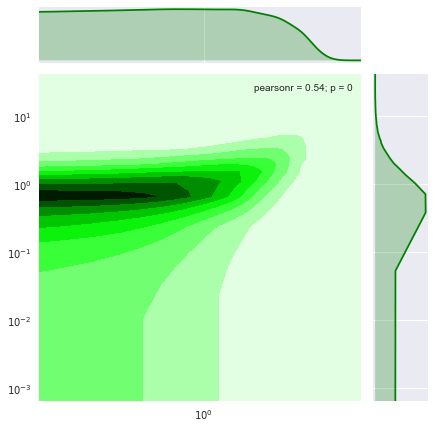

In [126]:
observed = np.log(DDS)
predicted = calc_dds(x)
g = sns.jointplot(observed, predicted, kind='kde', color='g')
#g.ax_joint.set_xlim(0,5)
#g.ax_joint.set_ylim(0,5)
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')
;

''

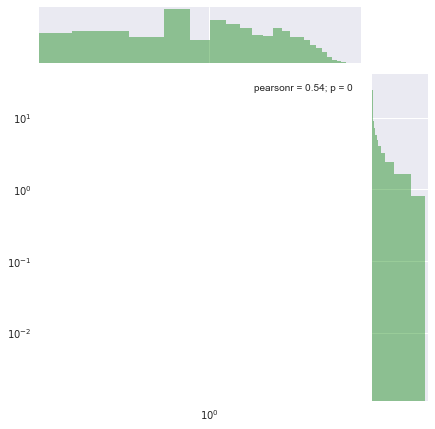

In [127]:
observed = np.log(DDS)
predicted = calc_dds(x)
g = sns.jointplot(observed, predicted, kind='hex', color='g')
#g.ax_joint.set_xlim(0,5)
#g.ax_joint.set_ylim(0,5)
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')
;

In [5]:
from pymc3.math import log, cos, sin, sqr, exp

In [7]:
with pm.Model():
    # Priors for each coefficient
    b_0 = pm.Normal("b_0", 0, 100, testval=-4.088)
    b_1 = pm.Normal("b_1", mu=0, sd=100, testval=1.051)
    b_2 = pm.Normal("b_2", mu=0, sd=100, testval=-0.0003178)
    b3 = pm.Normal("b3", mu=0, sd=100, testval=-0.008130)
    b4 = pm.Normal("b4", mu=0, sd=100, testval=0.01973)
    b5 = pm.Normal('b5', mu=0, sd=100, testval=-0.07356)
    b6 = pm.Normal('b6', mu=0, sd=100, testval=-0.0845)
    b7 = pm.Normal('b7', mu=0, sd=100, testval=-0.4575)
    b8 = pm.Normal('b8', mu=0, sd=100, testval=-0.00008782)
    b9 = pm.Normal('b9', mu=0, sd=100, testval=0.01468)
    b10 = pm.Normal('b10', mu=0, sd=100, testval=0.0003967)
    b11 = pm.Normal('b11', mu=0, sd=100, testval=0.9160)
    b12 = pm.Normal('b12', mu=0, sd=100, testval=0.9160)

    # Model error
    eps = pm.Uniform('eps', lower=-100, upper=100)

    # Model prediction of diameter increment squared
    dds = np.exp(b_0 + b_1*np.log(DBH) + b_2*(DBH**2) + b3*(BAL/np.log(DBH+1)) + \
                 b4*Slope*np.cos(Aspect) + b5*Slope*np.sin(Aspect) + b6*Slope + \
                 b7*(Slope**2) + b8*Elev + b9*CR + b10*BA + b11*np.log(MAT + 10) \
                 + b12*np.log(MAP))

    # Data likelihood
    y = pm.Gamma('y', mu=dds, sd=eps, observed=DDS)

00001	#include <Python.h>
00002	#include <iostream>
00003	#include "theano_mod_helper.h"
00004	#include <math.h>
00005	#include <numpy/arrayobject.h>
00006	#include <numpy/arrayscalars.h>
00007	#include <vector>
00008	#include <algorithm>
00009	//////////////////////
00010	////  Support Code
00011	//////////////////////
00012	
00013	
00014	    namespace {
00015	    struct __struct_compiled_op_m2ad72a75928ccc45247a126d08c3d3b3 {
00016	        PyObject* __ERROR;
00017	
00018	        PyObject* storage_V3;
00019	PyObject* storage_V5;
00020	PyObject* storage_V1;
00021	        
00022	
00023	        __struct_compiled_op_m2ad72a75928ccc45247a126d08c3d3b3() {
00024	            // This is only somewhat safe because we:
00025	            //  1) Are not a virtual class
00026	            //  2) Do not use any virtual classes in the members
00027	            //  3) Deal with mostly POD and pointers
00028	
00029	            // If this changes, we would have to revise this, but for
00030	            /

00212	        if (!PyErr_Occurred()) {
00213	            PyErr_SetString(PyExc_RuntimeError,
00214	                "Unexpected error in an Op's C code. "
00215	                "No Python exception was set.");
00216	            }
00217	        goto __label_4;}
00218	            }
00219	            // We expect NPY_FLOAT64
00220	            if (!PyArray_ISALIGNED((PyArrayObject*) py_V3)) {
00221	                PyArrayObject * tmp = (PyArrayObject*) py_V3;
00222	                PyErr_Format(PyExc_NotImplementedError,
00223	                             "expected an aligned array of type %ld "
00224	                             "(NPY_FLOAT64), got non-aligned array of type %ld"
00225	                             " with %ld dimensions, with 3 last dims "
00226	                             "%ld, %ld, %ld"
00227	                             " and 3 last strides %ld %ld, %ld.",
00228	                             (long int) NPY_FLOAT64,
00229	                             (long int) PyArray_TYPE

00382	                // If we can't resize the ndarray we have we can allocate a new one.
00383	                PyErr_Clear();
00384	                Py_XDECREF(V1);
00385	                V1 = (PyArrayObject*)PyArray_EMPTY(0, dims, NPY_FLOAT64, 0);
00386	            }
00387	        }
00388	        if (!V1) {
00389	            {
00390	        __failure = 7;
00391	        if (!PyErr_Occurred()) {
00392	            PyErr_SetString(PyExc_RuntimeError,
00393	                "Unexpected error in an Op's C code. "
00394	                "No Python exception was set.");
00395	            }
00396	        goto __label_7;}
00397	        }
00398	    }
00399	    
00400	
00401	                {
00402	                  
00403	                  V3_iter = (npy_float64*)(PyArray_DATA(V3));
00404	V5_iter = (npy_int8*)(PyArray_DATA(V5));
00405	V1_iter = (npy_float64*)(PyArray_DATA(V1));
00406	
00407	                  npy_float64& V3_i = *V3_iter;
00408	npy_int8& V5_i = *V5_iter;
00409	npy_float64& V1_i = *

Problem occurred during compilation with the command line below:
C:\Program Files\mingw-w64\x86_64-6.3.0-posix-seh-rt_v5-rev2\mingw64\bin\g++.exe -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -DMS_WIN64 -IC:\Users\ddiaz\AppData\Local\Continuum\Anaconda2\envs\Py3.5\lib\site-packages\numpy\core\include -IC:\Users\ddiaz\AppData\Local\Continuum\Anaconda2\envs\Py3.5\include -IC:\Users\ddiaz\AppData\Local\Continuum\Anaconda2\envs\Py3.5\lib\site-packages\theano\gof -o C:\Users\ddiaz\AppData\Local\Theano\compiledir_Windows-10-10.0.10586-SP0-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-3.5.3-64\tmpkn5meou8\m2ad72a75928ccc45247a126d08c3d3b3.pyd C:\Users\ddiaz\AppData\Local\Theano\compiledir_Windows-10-10.0.10586-SP0-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-3.5.3-64\tmpkn5meou8\mod.cpp -LC:\Users\ddiaz\AppData\Local\Continuum\Anaconda2\envs\Py3.5\libs -LC:\Users\ddiaz\AppData\Local\Continuum\

In file included from C:/Program Files/mingw-w64/x86_64-6.3.0-posix-seh-rt_v5-rev2/mingw64/lib/gcc/x86_64-w64-mingw32/6.3.0/include/c++/math.h:36:0,
                 from C:\Users\ddiaz\AppData\Local\Continuum\Anaconda2\envs\Py3.5\include/pyport.h:328,
                 from C:\Users\ddiaz\AppData\Local\Continuum\Anaconda2\envs\Py3.5\include/Python.h:50,
                 from C:\Users\ddiaz\AppData\Local\Theano\compiledir_Windows-10-10.0.10586-SP0-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-3.5.3-64\tmpkn5meou8\mod.cpp:1:
C:/Program Files/mingw-w64/x86_64-6.3.0-posix-seh-rt_v5-rev2/mingw64/lib/gcc/x86_64-w64-mingw32/6.3.0/include/c++/cmath:1157:11: error: '::hypot' has not been declared
   using ::hypot;
           ^~~~~



Exception: ("Compilation failed (return status=1): In file included from C:/Program Files/mingw-w64/x86_64-6.3.0-posix-seh-rt_v5-rev2/mingw64/lib/gcc/x86_64-w64-mingw32/6.3.0/include/c++/math.h:36:0,\r.                  from C:\\Users\\ddiaz\\AppData\\Local\\Continuum\\Anaconda2\\envs\\Py3.5\\include/pyport.h:328,\r.                  from C:\\Users\\ddiaz\\AppData\\Local\\Continuum\\Anaconda2\\envs\\Py3.5\\include/Python.h:50,\r.                  from C:\\Users\\ddiaz\\AppData\\Local\\Theano\\compiledir_Windows-10-10.0.10586-SP0-Intel64_Family_6_Model_58_Stepping_9_GenuineIntel-3.5.3-64\\tmpkn5meou8\\mod.cpp:1:\r. C:/Program Files/mingw-w64/x86_64-6.3.0-posix-seh-rt_v5-rev2/mingw64/lib/gcc/x86_64-w64-mingw32/6.3.0/include/c++/cmath:1157:11: error: '::hypot' has not been declared\r.    using ::hypot;\r.            ^~~~~\r. ", '[Elemwise{sub,no_inplace}(b_0, TensorConstant{0})]')